<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - TRỰC QUAN HOÁ DỮ LIỆU 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Giai đoạn 2.1 - Khám phá dữ liệu (tiếp) 📌
</div>

### Nhập các thư viện cần thiết

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime, date


warnings.simplefilter('ignore')

### Đọc dữ liệu

In [2]:
df = pd.read_csv('./data/Water_Cleaner_1.csv', parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

### 1. Chronological Order(Thứ tự thời gian) & Equidistant Timestamps (Dấu thời gian cách đều)

Dữ liệu phải được sắp xếp theo thứ tự thời gian và các dấu thời gian phải cách đều nhau trong chuỗi thời gian. Thứ tự thời gian có thể đạt được bằng cách sắp xếp lại DataFrame theo các dấu thời gian. Các dấu thời gian cách đều nhau chỉ ra rằng các khoảng thời gian là không đổi. ể kiểm tra điều này, có thể lấy sự khác biệt giữa mỗi dấu thời gian. Nếu không phải như vậy, có thể quyết định một khoảng thời gian cố định và lấy mẫu lại dữ liệu - `Resampling`.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  4199 non-null   datetime64[ns]
 1   Rainfall              4199 non-null   float64       
 2   Depth_to_Groundwater  4172 non-null   float64       
 3   Temperature           4199 non-null   float64       
 4   Drainage_Volume       4198 non-null   float64       
 5   River_Hydrometry      4199 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 197.0 KB


In [4]:
df = df.sort_values(by='Date')

# Check time intervals
df['Time_Interval'] = df['Date'] - df['Date'].shift(1)

df[['Date', 'Time_Interval']].head()

,Date,Time_Interval
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


Trong dữ liệu này, điều này đã được thực hiện: Khoảng thời gian là một ngày và dữ liệu đã được sắp xếp theo thứ tự thời gian. Do đó, không cần thực hiện bước chuẩn bị dữ liệu bổ sung này.

### 2. Handle Missings - Xử lý dữ liệu bị thiếu 

In [5]:
df = df.drop('Time_Interval', axis=1)
df.isnull().sum()

Date                     0
Rainfall                 0
Depth_to_Groundwater    27
Temperature              0
Drainage_Volume          1
River_Hydrometry         0
dtype: int64

- Như đã thấy, thì tập dữ liệu vẫn còn một số dữ liệu null.  
- Hơn nữa, trực quan theo Time-Series cho thấy các giá trị 0 là `null` đối với `Depth_to_Groundwater` và `Drainage_Volume`. Tiếp theo sẽ phải xử lý bằng cách thay thế bằng `NaN` và sau đó filling.

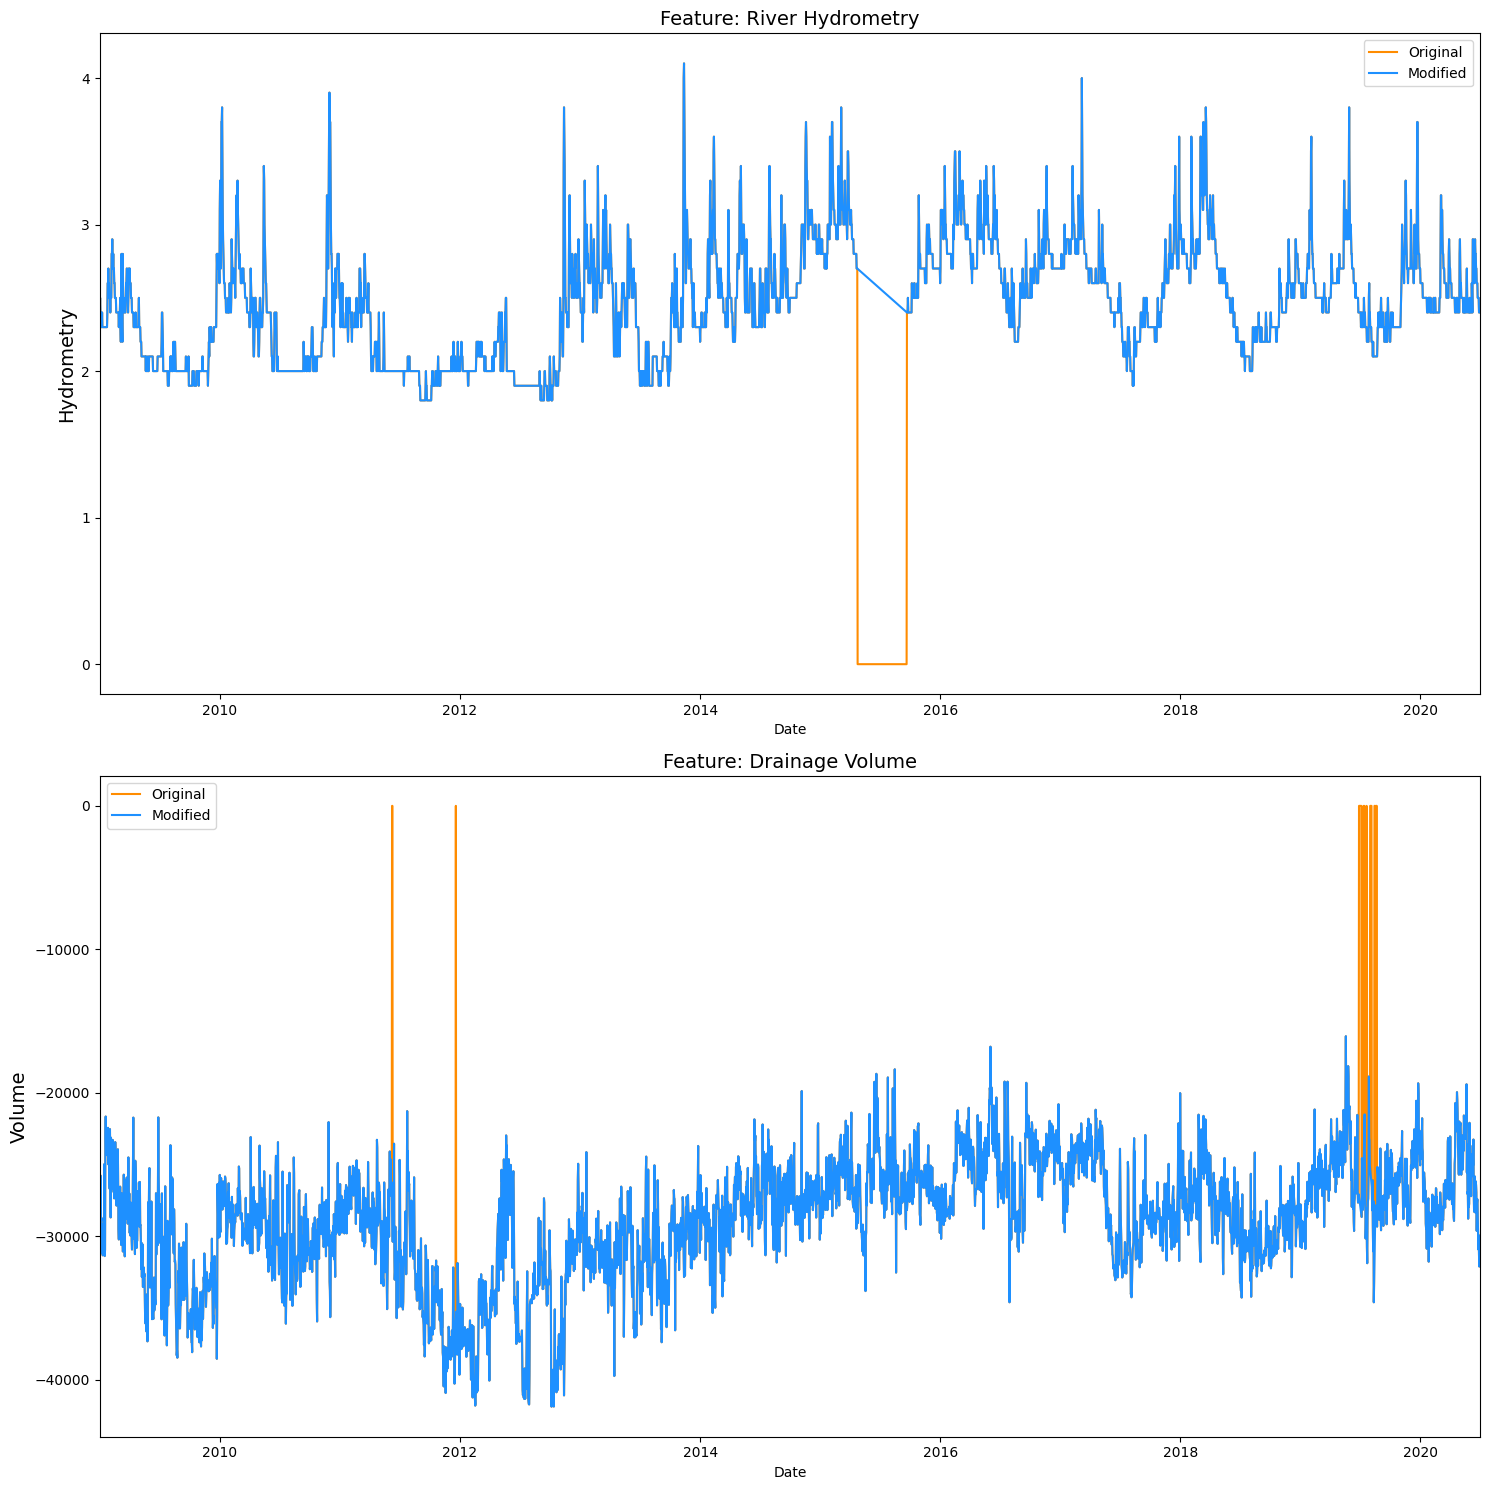

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

# River_Hydrometry
old_river_hydrometry = df.River_Hydrometry.copy()
# Thay thế giá trị 0 bằng NaN
df['River_Hydrometry'] = np.where(df.River_Hydrometry == 0, np.nan, df.River_Hydrometry)

sns.lineplot(x=df.Date, y=old_river_hydrometry.fillna(np.inf), ax=ax[0], color='darkorange', label='Original')
sns.lineplot(x=df.Date, y=df.River_Hydrometry.fillna(np.inf), ax=ax[0], color='dodgerblue', label='Modified')
ax[0].set_title('Feature: River Hydrometry', fontsize=14)
ax[0].set_ylabel('Hydrometry', fontsize=14)

# Drainage_Volume
old_drainage_volume = df.Drainage_Volume.copy()
# Thay thế giá trị 0 bằng NaN
df['Drainage_Volume'] = np.where(df.Drainage_Volume == 0, np.nan, df.Drainage_Volume)

sns.lineplot(x=df.Date, y=old_drainage_volume.fillna(np.inf), ax=ax[1], color='darkorange', label='Original')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label='Modified')
ax[1].set_title('Feature: Drainage Volume', fontsize=14)
ax[1].set_ylabel('Volume', fontsize=14)

# Đặt giới hạn trục x cho cả hai biểu đồ
for i in range(2):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

Giờ trực quan các giá trị `0` được thay thế bằng `null` và chuẩn bị các cách xử lý:

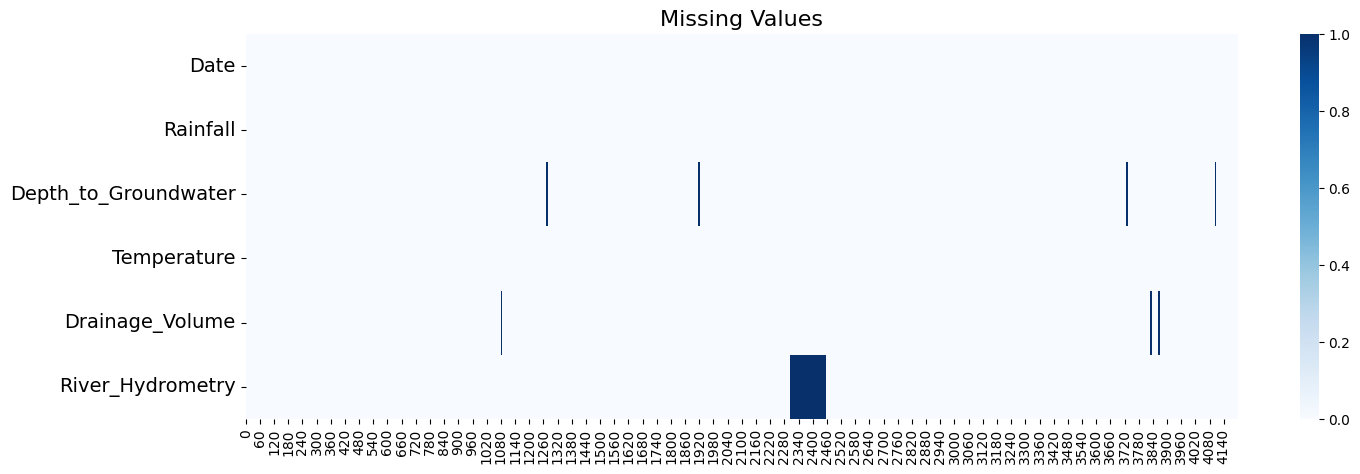

In [7]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14) 

plt.show()

**Nhóm đưa ra 4 phương án xử lý giá trị thiếu (NaN) trong dữ liệu, bây giờ hãy phân tích từng phương án:**

- **Phương án 1:** *Điền NaN bằng giá trị ngoại lệ hoặc bằng 0*
    - Cách làm: Thay thế tất cả các giá trị NaN bằng một giá trị được coi là ngoại lệ, chẳng hạn như -999, hoặc bằng 0.
    - Ưu điểm: Đơn giản, dễ thực hiện.
    - Nhược điểm:
        - Giá trị ngoại lệ: Nếu chọn một giá trị ngoại lệ như -999, nó có thể làm sai lệch kết quả phân tích, đặc biệt nếu mô hình học máy nhạy cảm với các giá trị lớn.
        - Giá trị 0: Điền bằng 0 có thể không phù hợp nếu dữ liệu có ý nghĩa khác khi bằng 0 (ví dụ: dữ liệu doanh thu).
        - Mất thông tin: Phương pháp này không tận dụng thông tin từ các giá trị xung quanh để ước tính giá trị thiếu.

- **Phương án 2:** *Điền NaN bằng giá trị trung bình*
    - Cách làm: Tính giá trị trung bình của các giá trị không thiếu trong cột dữ liệu, sau đó thay thế tất cả NaN bằng giá trị trung bình này.
    - Ưu điểm: Đơn giản, dễ thực hiện.
    - Nhược điểm:
        - Giảm độ biến động: Làm giảm độ biến động của dữ liệu, có thể ảnh hưởng đến kết quả phân tích, đặc biệt nếu dữ liệu có phân phối lệch.
        - Mất thông tin: Tương tự như phương án 1, không tận dụng thông tin từ các giá trị xung quanh.

- **Phương án 3:** *Điền NaN bằng giá trị cuối cùng với `.ffill()`*
    - Cách làm: Thay thế mỗi NaN bằng giá trị không thiếu gần nhất phía trước nó trong cùng cột dữ liệu.
    - Ưu điểm:
        - Đơn giản, dễ thực hiện.
        - Phù hợp với dữ liệu chuỗi thời gian: Đặc biệt hữu ích khi dữ liệu có tính chuỗi thời gian, giá trị cuối cùng thường là một ước tính hợp lý cho giá trị thiếu.
    - Nhược điểm:
        - Không phù hợp với dữ liệu không có thứ tự: Không nên sử dụng cho dữ liệu không có thứ tự thời gian hoặc không gian.
        - Có thể tạo ra các chuỗi giá trị lặp lại: Nếu có nhiều NaN liên tiếp, phương pháp này sẽ tạo ra các chuỗi giá trị lặp lại.
        
- **Phương án 4:** *Điền NaN bằng giá trị nội suy tuyến tính với `.interpolate()`*
    - Cách làm: Ước tính giá trị thiếu bằng cách nội suy tuyến tính từ các giá trị không thiếu xung quanh.
    - Ưu điểm:
        - Tận dụng thông tin từ các giá trị xung quanh: Cho kết quả ước tính thường chính xác hơn các phương pháp khác.
        - Phù hợp với dữ liệu có xu hướng: Đặc biệt hiệu quả khi dữ liệu có xu hướng tuyến tính.
    - Nhược điểm:
        - Yêu cầu dữ liệu có thứ tự: Chỉ nên sử dụng cho dữ liệu có thứ tự thời gian hoặc không gian.
        - Có thể không chính xác nếu dữ liệu không tuyến tính: Nếu dữ liệu có xu hướng phi tuyến tính, phương pháp này có thể cho kết quả không chính xác.

***Trực quan 4 phương án để chọn ra phương án tốt nhất:***

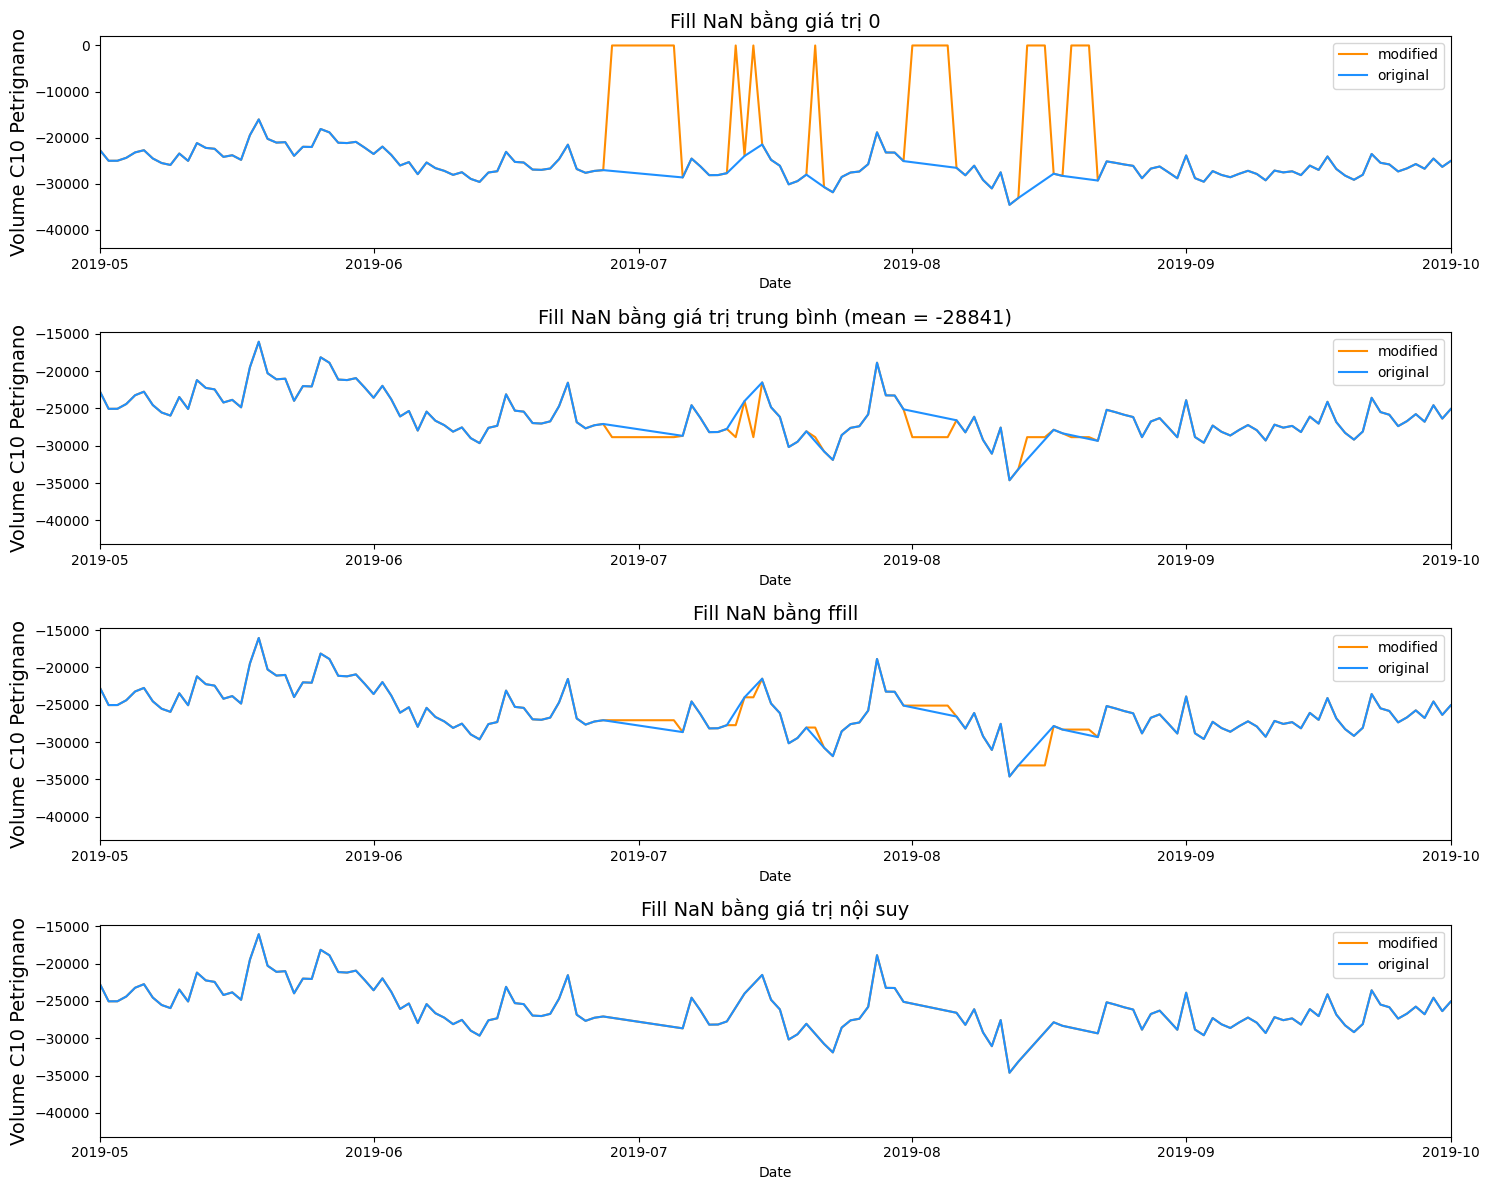

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

fill_methods = [
    ('Fill NaN bằng giá trị 0', 0),
    ('Fill NaN bằng giá trị trung bình', 'mean_interpolate'),  # Cải thiện phương pháp mean dùng thêm nội suy để cải thiện đồ thị
    ('Fill NaN bằng ffill', lambda x: x.ffill()),
    ('Fill NaN bằng giá trị nội suy', 'interpolate')
]

for ax, (title, method) in zip(axes, fill_methods):    
    filled_data = df.Drainage_Volume.copy()

    if method == 'mean_interpolate':
        mean_val = df.Drainage_Volume.mean()
        filled_data = filled_data.fillna(mean_val).interpolate()  # Nội suy sau khi điền giá trị trung bình
        title += f' (mean = {mean_val:.0f})'
    elif callable(method):
        filled_data = method(filled_data)
    elif method == 'interpolate':
        filled_data = filled_data.interpolate()
    else:
        filled_data = filled_data.fillna(method)

    sns.lineplot(x=df.Date, y=filled_data, ax=ax, color='darkorange', label='modified')
    sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax, color='dodgerblue', label='original')

    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Volume C10 Petrignano', fontsize=14)
    ax.set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    ax.legend()

plt.tight_layout()
plt.show()

Dựa theo đồ thị trực quan: Cách tốt nhất là ***Phương án nội suy tuyến tính***. 
- Các khoảng trống đã được lấp đầy một cách mượt mà, tạo thành một đường liên tục.
- Đường màu cam (modified) đi qua các điểm dữ liệu gốc một cách hợp lý và không có dấu hiệu của sự ngoại suy quá mức hoặc không phù hợp với xu hướng chung của dữ liệu.

***Sử dụng phương án nội suy tuyến tính lên các giá trị thiếu:***

In [9]:
df['Drainage_Volume'] = df['Drainage_Volume'].interpolate()
df['River_Hydrometry'] = df['River_Hydrometry'].interpolate()
df['Depth_to_Groundwater'] = df['Depth_to_Groundwater'].interpolate()

In [10]:
df.isna().sum()

Date                    0
Rainfall                0
Depth_to_Groundwater    0
Temperature             0
Drainage_Volume         0
River_Hydrometry        0
dtype: int64

#### Reduce

Các kĩ thuật reduce phổ biến:
- Smoothing: áp dụng moving averages
- Aggregation: trực quan dữ liệu theo tuần, tháng, năm...
- PCA: giảm chiều dữ liệu

Smoothing: áp dụng moving averages

In [ ]:

df['Depth_to_Groundwater_MA30'] = df['Depth_to_Groundwater'].rolling(window=30).mean()

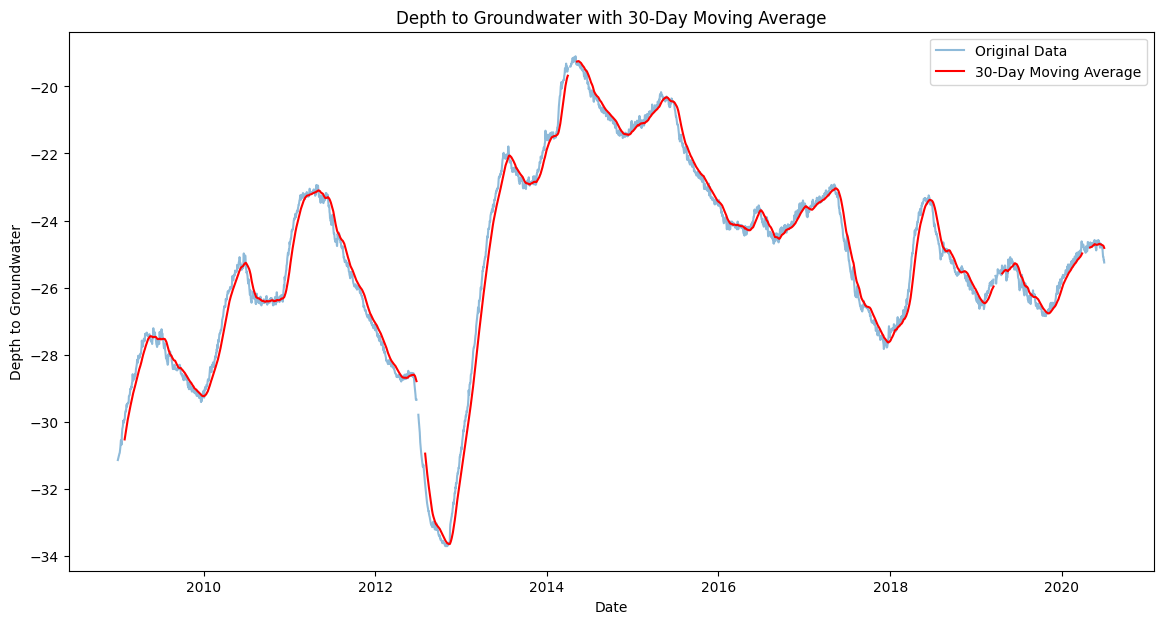

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

#  30-day moving average 
df['Depth_to_Groundwater_MA30'] = df['Depth_to_Groundwater'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Depth_to_Groundwater'], alpha=0.5, label='Original Data')
plt.plot(df.index, df['Depth_to_Groundwater_MA30'], color='red', label='30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Depth to Groundwater')
plt.title('Depth to Groundwater with 30-Day Moving Average')
plt.legend()
plt.show()

In [12]:
df.isna().sum()

Rainfall                       0
Depth_to_Groundwater          27
Temperature                    0
Drainage_Volume               26
River_Hydrometry             150
Depth_to_Groundwater_MA30    172
dtype: int64

In [23]:
df.columns

Index(['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature',
       'Drainage_Volume', 'River_Hydrometry'],
      dtype='object')

#### Decomposition

nói về decomposition là gì, công thức...

https://medium.com/@roshmitadey/time-series-decomposition-62cbf31ab65e

model cộng

Lý do không sử dụng model nhân vì dữ liệu có số âm và số 0 nên ta chỉ dùng model cộng.

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_cols =  ['Rainfall', 'Temperature', 
                   'Drainage_Volume', 
                   'River_Hydrometry', 'Depth_to_Groundwater']

for col in decompose_cols:
    decomp = seasonal_decompose(df[col], period=52, model='additive', extrapolate_trend='freq')
    df[f"{col}_trend"] = decomp.trend
    df[f"{col}_seasonal"] = decomp.seasonal

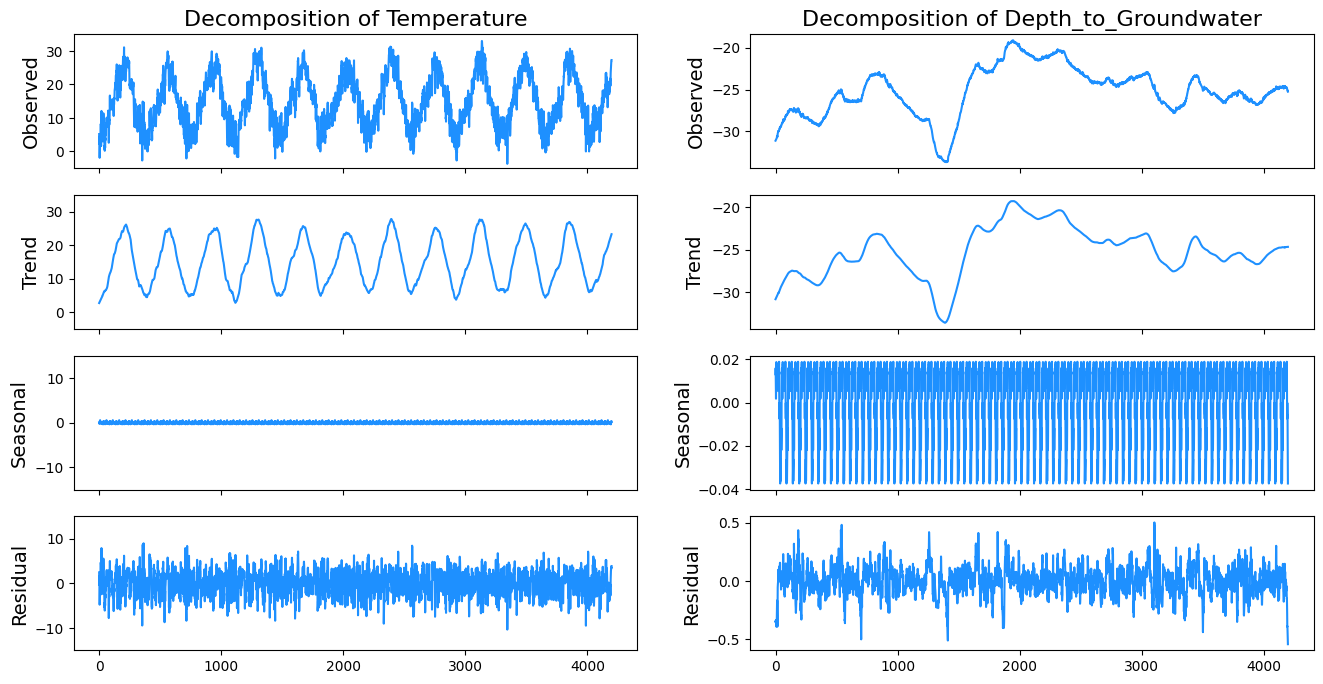

In [30]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))
res = seasonal_decompose(df.Temperature, period=52, model='additive', extrapolate_trend='freq')

ax[0,0].set_title('Decomposition of Temperature', fontsize=16)
res.observed.plot(ax=ax[0,0], legend=False, color='dodgerblue')
ax[0,0].set_ylabel('Observed', fontsize=14)
ax[0,0].set_ylim([-5, 35])

res.trend.plot(ax=ax[1,0], legend=False, color='dodgerblue')
ax[1,0].set_ylabel('Trend', fontsize=14)
ax[1,0].set_ylim([-5, 35])

res.seasonal.plot(ax=ax[2,0], legend=False, color='dodgerblue')
ax[2,0].set_ylabel('Seasonal', fontsize=14)
ax[2,0].set_ylim([-15, 15])

res.resid.plot(ax=ax[3,0], legend=False, color='dodgerblue')
ax[3,0].set_ylabel('Residual', fontsize=14)
ax[3,0].set_ylim([-15, 15])

ax[0,1].set_title('Decomposition of Depth_to_Groundwater', fontsize=16)
res = seasonal_decompose(df.Depth_to_Groundwater, period=52, model='additive', extrapolate_trend='freq')

res.observed.plot(ax=ax[0, 1], legend=False, color='dodgerblue')
ax[0, 1].set_ylabel('Observed', fontsize=14)

res.trend.plot(ax=ax[1, 1], legend=False, color='dodgerblue')
ax[1, 1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[2, 1], legend=False, color='dodgerblue')
ax[2, 1].set_ylabel('Seasonal', fontsize=14)

res.resid.plot(ax=ax[3, 1], legend=False, color='dodgerblue')
ax[3, 1].set_ylabel('Residual', fontsize=14)

plt.show()

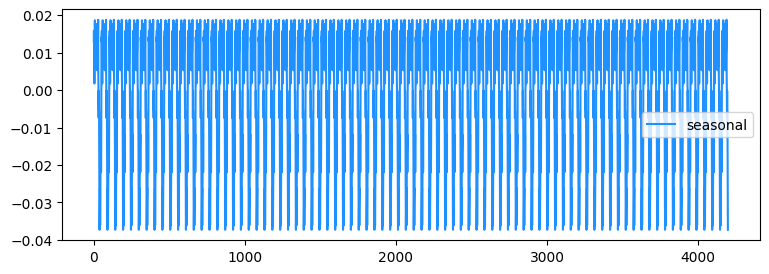

In [31]:
res = seasonal_decompose(df.Depth_to_Groundwater, period=52, model='additive', extrapolate_trend='freq')

plt.figure(figsize=(9, 3))
res.seasonal.plot( legend=False, color='dodgerblue')
plt.legend()

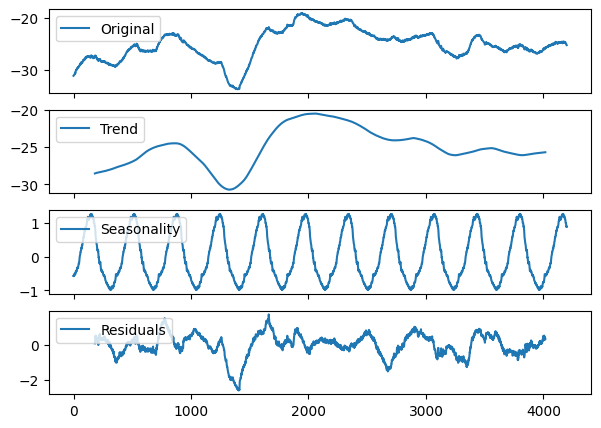

In [19]:
additive_decomposition = seasonal_decompose(x=df.Depth_to_Groundwater, model='additive', period=365)
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()
    
seas_decomp_plots(df.Depth_to_Groundwater, additive_decomposition)

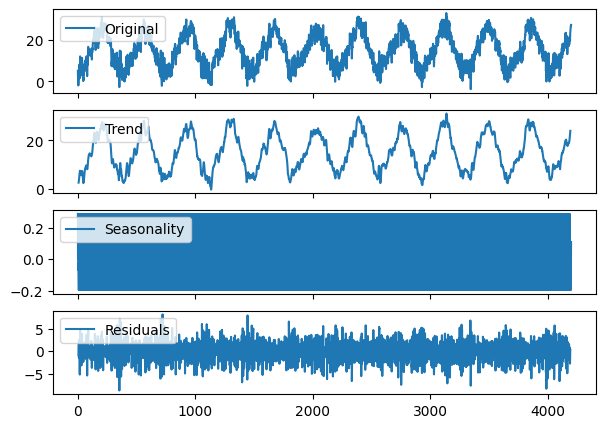

In [16]:
additive_decomposition = seasonal_decompose(x=df.Temperature, model='additive', period=12)
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()
    
seas_decomp_plots(df.Temperature, additive_decomposition)

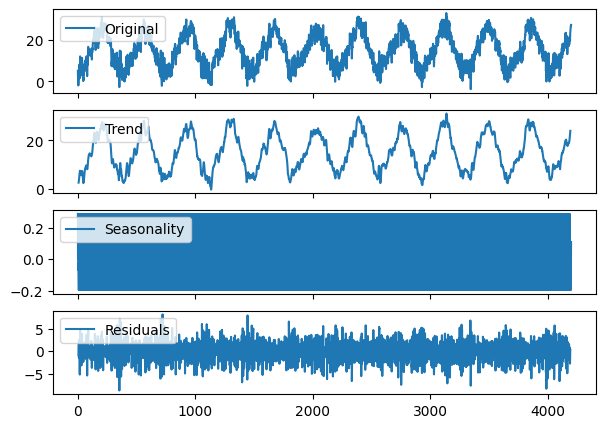

In [18]:
additive_decomposition = seasonal_decompose(x=df.Temperature, model='additive', period=12)
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()
    
seas_decomp_plots(df.Temperature, additive_decomposition)

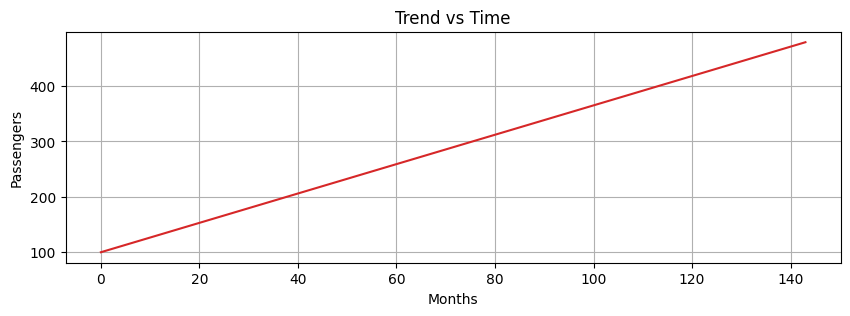

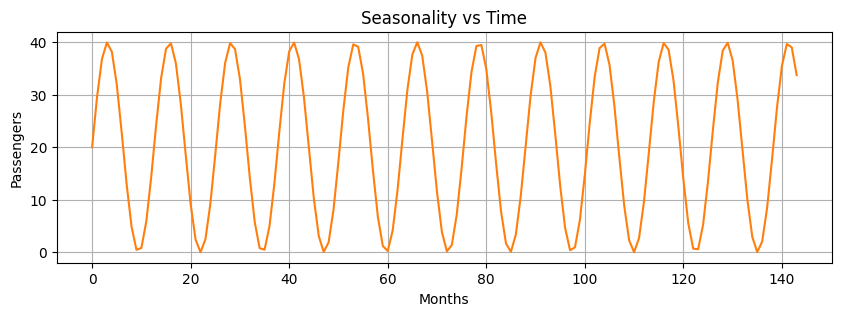

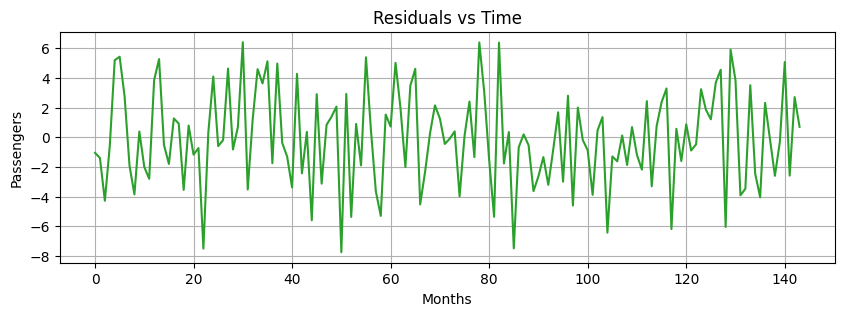

In [14]:
time = np.arange(144)
trend = time * 2.65 +100

fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, trend, color='tab:red')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Trend vs Time");

seasonal = 20 + np.sin( time * 0.5) * 20
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, seasonal, color='tab:orange')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Seasonality vs Time");

residuals = np.random.normal(loc=0.0, scale=3, size=len(time))

fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, residuals, color='tab:green')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Residuals vs Time");

additive = trend + seasonal + residuals


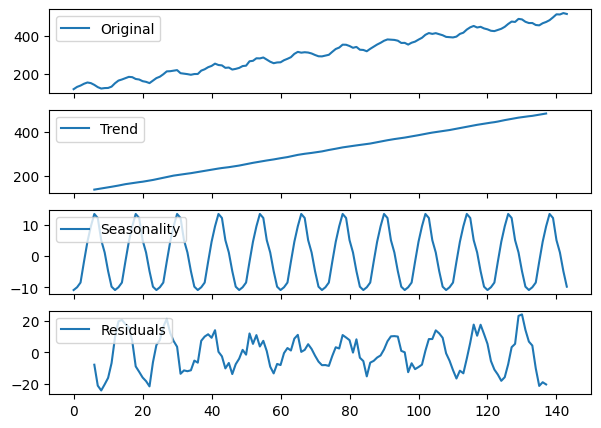

In [15]:
additive_decomposition = seasonal_decompose(x=additive, model='additive', period=12)
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()
    
seas_decomp_plots(additive, additive_decomposition)


### 3. Smoothing data/Resampling - Làm mịn dữ liệu với lấy mẫu lại

**Resampling (Lấy mẫu lại)** là một kỹ thuật quan trọng trong phân tích dữ liệu chuỗi thời gian, có thể cung cấp thêm thông tin về dữ liệu. Có hai loại resampling:

***1. Upsampling (Lấy mẫu lên):***
- *Ý tưởng:* Tăng tần suất lấy mẫu của dữ liệu. Ví dụ, chuyển từ dữ liệu ngày sang dữ liệu giờ, hoặc từ dữ liệu tháng sang dữ liệu ngày.
- *Cách thực hiện:*
    - Điền thêm các điểm dữ liệu mới giữa các điểm dữ liệu hiện có.
    - Các giá trị cho các điểm dữ liệu mới có thể được nội suy từ các giá trị xung quanh hoặc được điền bằng các phương pháp khác (ví dụ: điền 0, điền bằng giá trị cuối cùng).
- *Ứng dụng:*
    - Phân tích dữ liệu ở tần suất chi tiết hơn.
    - Đồng bộ hóa các bộ dữ liệu có tần suất lấy mẫu khác nhau.
    - Chuẩn bị dữ liệu cho các mô hình học máy yêu cầu dữ liệu có tần suất đều đặn.

***2. Downsampling (Lấy mẫu xuống):***
- *Ý tưởng:* Giảm tần suất lấy mẫu của dữ liệu. Ví dụ, chuyển từ dữ liệu ngày sang dữ liệu tuần, hoặc từ dữ liệu giờ sang dữ liệu ngày.
- *Cách thực hiện:*
    - Gom nhóm các điểm dữ liệu lại theo một khoảng thời gian nhất định (ví dụ: một tuần, một tháng).
    - Áp dụng một hàm tổng hợp (ví dụ: trung bình, tổng, giá trị lớn nhất, giá trị nhỏ nhất) lên mỗi nhóm để tạo ra một điểm dữ liệu mới đại diện cho nhóm đó.
- *Ứng dụng:*
    - Tổng hợp dữ liệu theo các khoảng thời gian lớn hơn.
    - Giảm nhiễu trong dữ liệu.
    - Tạo các biểu đồ tổng quan (ví dụ: biểu đồ xu hướng theo tháng).

📌 Dựa trên việc dữ liệu kéo dài nhiều năm, `Downsampling `là một lựa chọn hợp lý để tổng hợp thông tin và giảm nhiễu. 

- Tuy nhiên, việc lựa chọn giữa ba phương án downsampling (ngày, tuần, tháng) sẽ phụ thuộc vào mục tiêu phân tích cụ thể và đặc điểm của dữ liệu.

    - **Theo ngày ('D'):** Giữ lại nhiều chi tiết nhất, dùng khi cần phân tích các biến động ngắn hạn.

    - **Theo tuần ('W'):** Giảm nhiễu đáng kể, giữ lại các xu hướng chung theo tuần, dùng khi cần phân tích các biến động trung và dài hạn.

    - **Theo tháng ('M'):** Giảm nhiễu nhiều nhất, cho phép tập trung vào các xu hướng dài hạn, dùng khi cần phân tích các biến động rất dài hạn.

$\rightarrow$ Chọn giữa tuần hoặc tháng tuy nhiên sẽ trực quan cả 3 để có cái nhìn tổng quát nhất.

***Trực quan để chọn phương án tốt nhất:***
Lựa chọn 2 yếu tố là `Drainage_Volume` và `Temperature` vì:
- *Đại diện:* Việc chọn 2 thuộc tính này giúp minh họa cách resampling có thể được áp dụng cho các loại dữ liệu khác nhau.
    - `Drainage_Volume` có thể là dữ liệu liên tục hoặc rời rạc.
    - `Temperature` là dữ liệu liên tục.
- *Liên quan:* 2 thuộc tính này liên quan đến nhau. 
    - Nhiệt độ cao có thể làm tăng sự bốc hơi, dẫn đến giảm lượng thoát nước. 
    - Ngược lại, nhiệt độ thấp có thể làm giảm sự bốc hơi, dẫn đến tăng lượng thoát nước. 
    - Việc resampling cả hai thuộc tính này cho phép phân tích mối quan hệ giữa chúng ở các tần suất thời gian khác nhau.

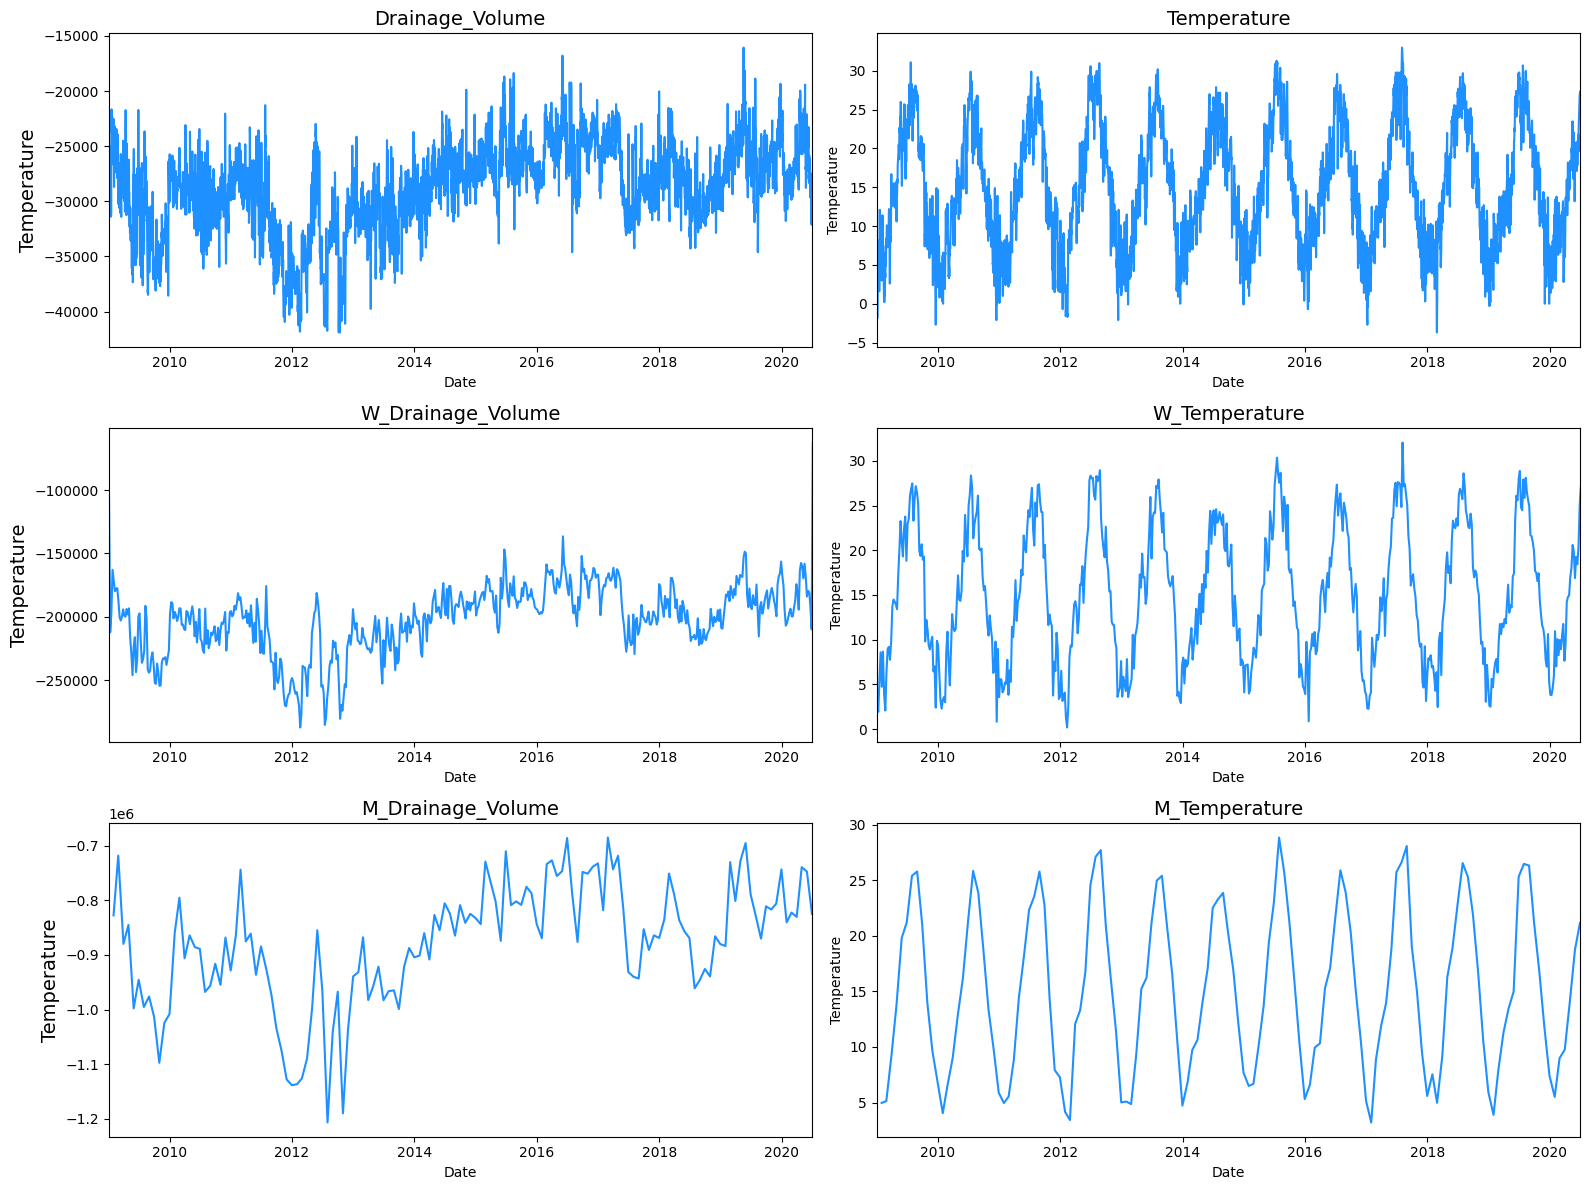

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

for i, (column, agg_func) in enumerate([('Drainage_Volume', 'sum'), ('Temperature', 'mean')]):
    for j, rule in enumerate(['D', 'W', 'M']):  # Thay đổi tần suất lấy mẫu
        ax = axes[j, i]
        resampled_df = df[['Date', column]].resample(rule, on='Date').agg(agg_func).reset_index()
        sns.lineplot(x='Date', y=column, data=resampled_df, ax=ax, color='dodgerblue')

        title = f'{rule.upper()}_{column}' if rule != 'D' else column
        ax.set_title(title, fontsize=14)
        ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

        if i == 0:
            ylabel = 'Volume C10 Petrignano' if column == 'Drainage_volume' else 'Temperature'
            ax.set_ylabel(ylabel, fontsize=14)

plt.tight_layout()
plt.show()

Dựa theo đồ thị trực quan: Cách tốt nhất là Resampling ***theo Tuần***. 
- Cách này sẽ giúp việc phân tích trở nên dễ dàng và ít mất dữ liệu hơn.

In [21]:
df_downsampled = df[['Date',
                     'Depth_to_Groundwater', 
                     'Temperature',
                     'Drainage_Volume', 
                     'River_Hydrometry'
                    ]].resample('7D', on='Date').mean().reset_index(drop=False)

df_downsampled['Rainfall'] = df[['Date',
                                 'Rainfall'
                                ]].resample('7D', on='Date').sum().reset_index(drop=False)[['Rainfall']]

df = df_downsampled

DECOMPOSE

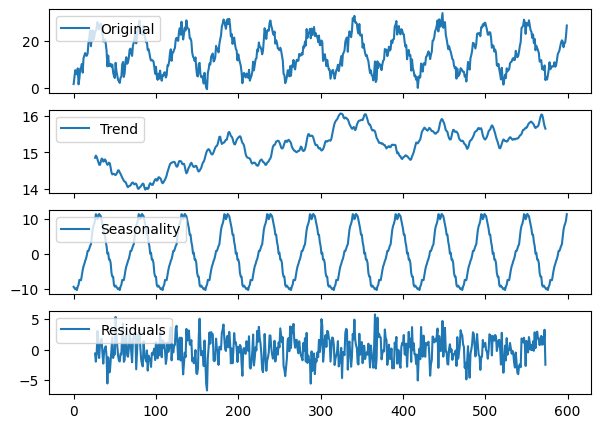

6.511111111111111

In [33]:
additive_decomposition = seasonal_decompose(x=df.Temperature, model='additive', period=52)
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()
    
seas_decomp_plots(df.Temperature, additive_decomposition)
from scipy.signal import find_peaks
peaks, _ = find_peaks(additive_decomposition.seasonal)
peak_intervals = np.diff(peaks)

# Average peak interval to find the period
average_period = np.mean(peak_intervals)
average_period

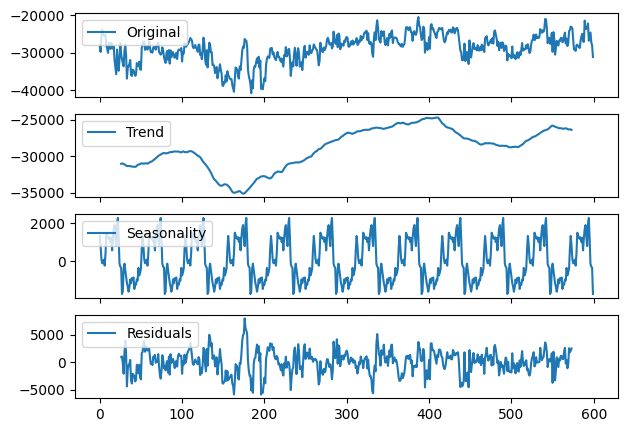

3.7044025157232703

In [32]:
additive_decomposition = seasonal_decompose(x=df.Drainage_Volume, model='additive', period=52)
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()
    
seas_decomp_plots(df.Drainage_Volume, additive_decomposition)
from scipy.signal import find_peaks
peaks, _ = find_peaks(additive_decomposition.seasonal)
peak_intervals = np.diff(peaks)

# Average peak interval to find the period
average_period = np.mean(peak_intervals)
average_period

In [30]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(additive_decomposition.seasonal)
peak_intervals = np.diff(peaks)

# Average peak interval to find the period
average_period = np.mean(peak_intervals)
average_period

In [31]:
average_period

3.7044025157232703

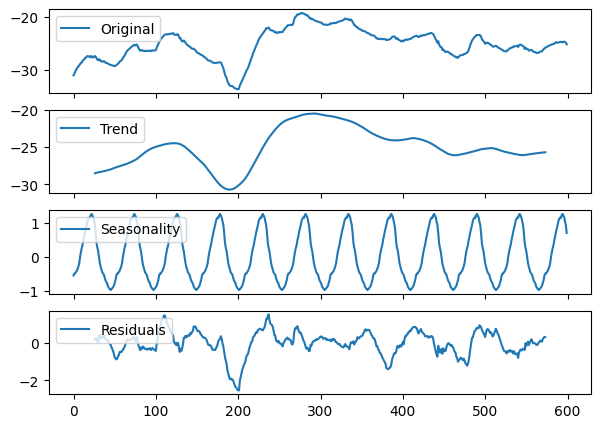

In [28]:
additive_decomposition = seasonal_decompose(x=df.Depth_to_Groundwater, model='additive', period=52)
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()
    
seas_decomp_plots(df.Depth_to_Groundwater, additive_decomposition)

In [27]:
additive_decomposition.seasonal

0      -9.442364
1      -9.816713
2     -10.145348
3      -9.885677
4     -10.357436
         ...    
595     6.833238
596     7.962001
597     8.574941
598     9.537518
599    11.299257
Name: seasonal, Length: 600, dtype: float64

**Lý do tách cột Rainfall:**
- Các cột `Depth_to_Groundwater`, `Temperature`, `Drainage_Volume` và `River_Hydrometry` là các đại lượng đo lường liên tục, thể hiện mức độ hoặc giá trị tại một thời điểm cụ thể. Khi downsample theo tuần, việc `tính trung bình` của các giá trị này trong tuần là một cách hợp lý để đại diện cho xu hướng chung trong khoảng thời gian đó.

- Cột `Rainfall` là dữ liệu tích lũy, thể hiện tổng lượng mưa trong một khoảng thời gian. Khi downsample theo tuần, việc `tính tổng` lượng mưa trong tuần sẽ cung cấp thông tin chính xác hơn về lượng mưa thực tế xảy ra trong khoảng thời gian đó.

### 4. Stationarity - Kiểm tra Tính Dừng

Một chuỗi thời gian được coi là `Stationarity - Dừng` khi các thuộc tính thống kê của nó (như giá trị trung bình, phương sai, và hiệp phương sai) không thay đổi theo thời gian.   

$\rightarrow$ Điều này có nghĩa là chuỗi thời gian không có xu hướng (trend) hoặc tính mùa vụ (seasonality) rõ ràng.

***Các điều kiện:***   

Để một chuỗi thời gian được coi là dừng, nó cần thỏa mãn ba điều kiện sau:
- *Giá trị trung bình không đổi theo thời gian:* Trung bình của chuỗi thời gian không tăng hoặc giảm theo thời gian.

- *Phương sai không đổi theo thời gian:* Sự biến động (đo bằng phương sai) của chuỗi thời gian không thay đổi theo thời gian.

- *Hiệp phương sai không đổi theo thời gian:* Mối quan hệ giữa các quan sát ở các thời điểm khác nhau (đo bằng hiệp phương sai) không thay đổi theo thời gian.

📌 ***Tại sao tính dừng lại quan trọng?***

**Stationarity - Tính dừng** là một giả định quan trọng trong nhiều mô hình chuỗi thời gian, đặc biệt là các mô hình như `ARIMA` (Autoregressive Integrated Moving Average). Nếu dữ liệu không dừng, các mô hình này có thể đưa ra dự báo không chính xác.

**Có ba phương pháp chính để kiểm tra tính dừng của một chuỗi thời gian:**
- *Kiểm tra bằng trực quan:* Vẽ biểu đồ chuỗi thời gian và quan sát xem có xu hướng (trend) hoặc tính mùa vụ (seasonality) không. Nếu có, chuỗi thời gian không dừng.

- *Kiểm tra bằng thống kê cơ bản:* Chia chuỗi thời gian thành các phần nhỏ hơn và so sánh giá trị trung bình và phương sai của từng phần. Nếu có sự khác biệt đáng kể, chuỗi thời gian không dừng.

- *Kiểm tra bằng phương pháp thống kê (Statistical test):* Sử dụng các kiểm định thống kê như Augmented Dickey-Fuller (ADF) test để kiểm tra giả thuyết về tính dừng.

#### 4.1. Trực quan 

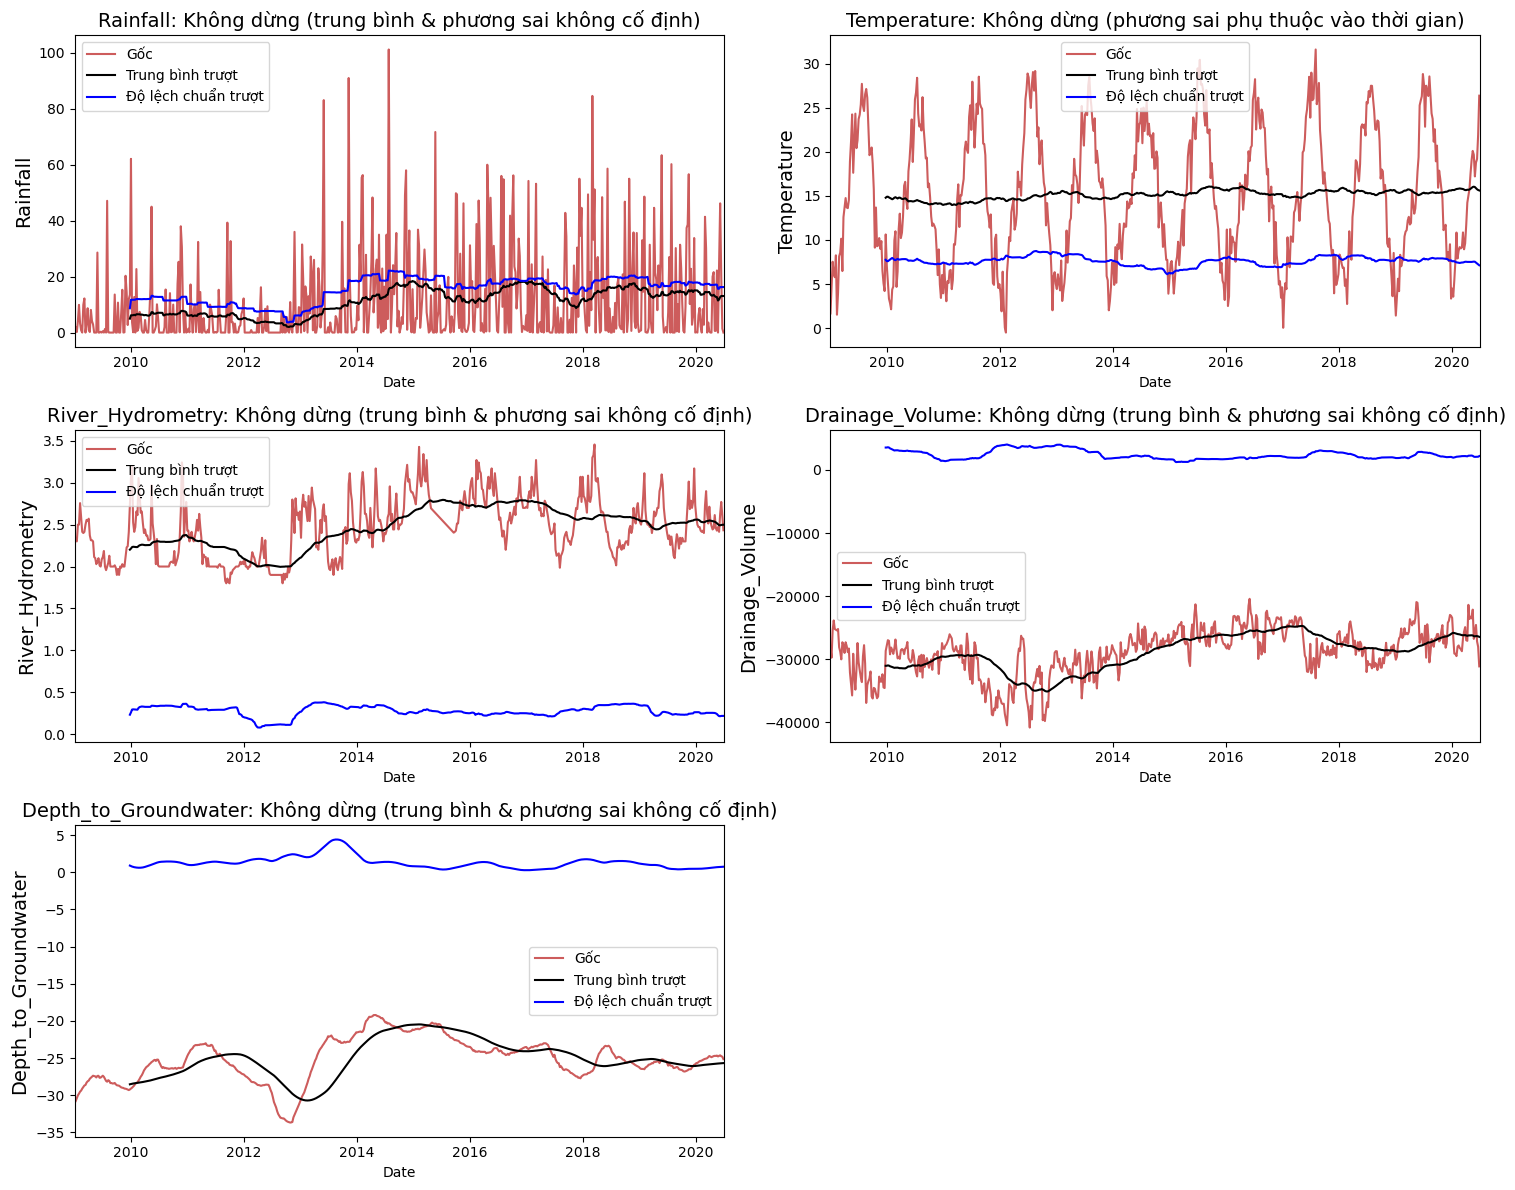

In [13]:
rolling_window = 52 # Giá trị trung bình trượt sử dụng cho biểu đồ
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

columns_and_titles = [
    ('Rainfall', 'Rainfall: Không dừng (trung bình & phương sai không cố định)'),
    ('Temperature', 'Temperature: Không dừng (phương sai phụ thuộc vào thời gian)'),
    ('River_Hydrometry', 'River_Hydrometry: Không dừng (trung bình & phương sai không cố định)'),
    ('Drainage_Volume', 'Drainage_Volume: Không dừng (trung bình & phương sai không cố định)'),
    ('Depth_to_Groundwater', 'Depth_to_Groundwater: Không dừng (trung bình & phương sai không cố định)')
]

for i, (column, title) in enumerate(columns_and_titles):
    row = i // 2
    col = i % 2
    
    sns.lineplot(x=df.Date, y=df[column], ax=axes[row, col], color='indianred', label='Gốc')
    
    # Tính trung bình và độ lệch chuẩn trượt
    rolling_mean = df[column].rolling(rolling_window).mean()
    rolling_std = df[column].rolling(rolling_window).std()

    sns.lineplot(x=df.Date, y=rolling_mean, ax=axes[row, col], color='black', label='Trung bình trượt')
    sns.lineplot(x=df.Date, y=rolling_std, ax=axes[row, col], color='blue', label='Độ lệch chuẩn trượt')
    
    axes[row, col].set_title(title, fontsize=14)
    axes[row, col].set_ylabel(ylabel=column, fontsize=14)
    axes[row, col].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    axes[row, col].legend()


fig.delaxes(axes[2, 1]) 

plt.tight_layout()
plt.show()


**Nhận xét:**
- *Rainfall:*
    - Có tính biến động cao, với nhiều đỉnh và đáy nhọn.
    - Trung bình trượt và độ lệch chuẩn trượt cũng biến động mạnh theo thời gian, cho thấy cả trung bình và phương sai của lượng mưa đều không cố định.
    - Có thể có một số yếu tố mùa vụ, nhưng không rõ ràng.

- *River_Hydrometry:*
    - Có xu hướng giảm dần theo thời gian, thể hiện bằng đường trung bình trượt dốc xuống.
    - Phương sai có vẻ khá ổn định, nhưng cũng có một số biến động nhỏ theo thời gian.

- *Temperature:*
    - Thể hiện tính mùa vụ rõ ràng, với nhiệt độ cao hơn vào mùa hè và thấp hơn vào mùa đông.
    - Trung bình trượt dao động theo mùa, trong khi độ lệch chuẩn trượt tương đối ổn định.

- *Drainage_Volume:*
    - Có xu hướng giảm dần theo thời gian, tương tự như thủy văn.
    - Phương sai có vẻ không ổn định, với một số biến động lớn theo thời gian.

- *River_Hydrometry:*
    - Có xu hướng giảm dần theo thời gian.
    - Phương sai có vẻ khá ổn định, nhưng cũng có một số biến động nhỏ theo thời gian.

$\longrightarrow$  **Kết luận:** Tất cả các thuộc tính trong dữ liệu đều không dừng, nhưng có các dạng không dừng khác nhau. `Rainfall` và `Drainage_Volume` có cả trung bình và phương sai không cố định. `River_Hydrometry `và `River_Hydrometry` có trung bình không cố định nhưng phương sai khá ổn định. `Temperature` có phương sai không cố định do tính mùa vụ.

#### 4.2. Thống kê cơ bản

Dữ liệu được chia làm `2 phần` để thực hiện thống kê với mục đích:
- *Kiểm tra tính ổn định theo thời gian.*

- *Phân tích sự thay đổi.*

- *So sánh mẫu.*

In [14]:
num_partitions = 2
partition_length = int(len(df) / num_partitions)

# Chỉ lấy các cột số để tránh Datetime của Date
numeric_cols = df.select_dtypes(include=np.number).columns

partition1_mean = df.head(partition_length)[numeric_cols].mean()
partition1_var = df.head(partition_length)[numeric_cols].var()
partition2_mean = df.tail(partition_length)[numeric_cols].mean()
partition2_var = df.tail(partition_length)[numeric_cols].var()

In [15]:
stationarity_test = pd.concat([partition1_mean, partition2_mean, partition1_var, partition2_var], axis=1)
stationarity_test.columns = ['Partition 1 Mean', 'Partition 2 Mean', 'Partition 1 Variance', 'Partition 2 Variance']

def highlight_greater(x):
    temp = x.copy().round(0).astype(int)
    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    
    cols = ['Mean', 'Variance']
    conditions = {
        'Mean': (temp['Partition 1 Mean'] == temp['Partition 2 Mean']),
        'Variance': (temp['Partition 1 Variance'] == temp['Partition 2 Variance'])
    }
    ranges = {
        'Mean': (temp['Partition 1 Mean'] < temp['Partition 2 Mean']+3) & (temp['Partition 1 Mean'] > temp['Partition 2 Mean']-3),
        'Variance': (temp['Partition 1 Variance'] < temp['Partition 2 Variance']+3) & (temp['Partition 1 Variance'] > temp['Partition 2 Variance']-3)
    }

    for col in cols:
        for part in ['Partition 1', 'Partition 2']:
            df1[f'{part} {col}'] = np.where(~conditions[col], 'background-color: salmon', df1[f'{part} {col}'])
            df1[f'{part} {col}'] = np.where(ranges[col], 'background-color: gold', df1[f'{part} {col}'])
            df1[f'{part} {col}'] = np.where(conditions[col], 'background-color: mediumseagreen', df1[f'{part} {col}'])

    return df1

stationarity_test.style.apply(highlight_greater, axis=None).format("{:20,.0f}")


,Partition 1 Mean,Partition 2 Mean,Partition 1 Variance,Partition 2 Variance
Depth_to_Groundwater,-26,-24,13,4
Temperature,15,15,58,56
Drainage_Volume,"-30,989","-26,684","12,053,921","5,955,484"
River_Hydrometry,2,3,0,0
Rainfall,8,14,197,306


> **Chú thích:**
> - Màu xanh lá cây: Giá trị trung bình hoặc phương sai của hai phần bằng nhau.
> - Màu vàng: Giá trị trung bình hoặc phương sai của hai phần khác nhau nhưng nằm trong khoảng cho phép (+/- 3).
> - Màu hồng: Giá trị trung bình hoặc phương sai của hai phần khác nhau vượt quá khoảng cho phép.

**Nhận xét:**
- *Depth_to_Groundwater:*
    - Giá trị trung bình ở `Partition 1 (-26) `thấp hơn so với `Partition 2 (-24)`, cho thấy mực nước ngầm ở `Partition 1` sâu hơn.
    - Phương sai ở `Partition 1 (13)` cao hơn `Partition 2 (4)`, cho thấy độ sâu mực nước ngầm ở `Partition 1` biến động nhiều hơn.

- *Temperature:*
    - Giá trị trung bình giữa hai phân vùng là như nhau `(15)`, cho thấy không có sự khác biệt về nhiệt độ trung bình.
    - Phương sai ở cả hai phân vùng tương đối cao và gần bằng nhau `(58 và 56)`, cho thấy nhiệt độ ở cả hai nơi đều biến động mạnh.

- *Drainage_Volume:*
    - Giá trị trung bình ở `Partition 1 (-30,989)` thấp hơn so với `Partition 2 (-26,684)`, cho thấy khối lượng thoát nước trung bình ở `Partition 1` lớn hơn.
    - Phương sai ở `Partition 1 (12,053,921)` cao hơn rất nhiều so với `Partition 2 (5,955,484)`, cho thấy khối lượng thoát nước ở `Partition 1` biến động rất mạnh.

- *River_Hydrometry:*
    - Giá trị trung bình ở `Partition 1 (2)` thấp hơn so với `Partition 2 (3)`.
    - Phương sai bằng `0` ở cả hai phân vùng, cho thấy không có sự biến động về thủy lượng sông.

- *Rainfall:*
    - Giá trị trung bình ở `Partition 1 (8)` thấp hơn so với `Partition 2 (14)`, cho thấy lượng mưa trung bình ở `Partition 1` thấp hơn.
    - Phương sai ở `Partition 2 (306)` cao hơn so với `Partition 1 (197)`, cho thấy lượng mưa ở `Partition 2` biến động mạnh hơn.

$\longrightarrow$ **Nhận xét chung:**  
- Có sự khác biệt đáng kể giữa hai phân vùng về `Depth_to_Groundwate`, Drainage_Volume và `Rainfall`.

- `Temperature` trung bình giữa hai phân vùng là như nhau, nhưng có sự biến động lớn.

- `River_Hydrometry` có sự khác biệt nhỏ giữa hai phân vùng và không có sự biến động.

***Trực quan để chắc chắn dữ liệu tuân theo phân bố Gaussian (phân bố hình chuông) trong trường hợp dữ liệu dừng.***

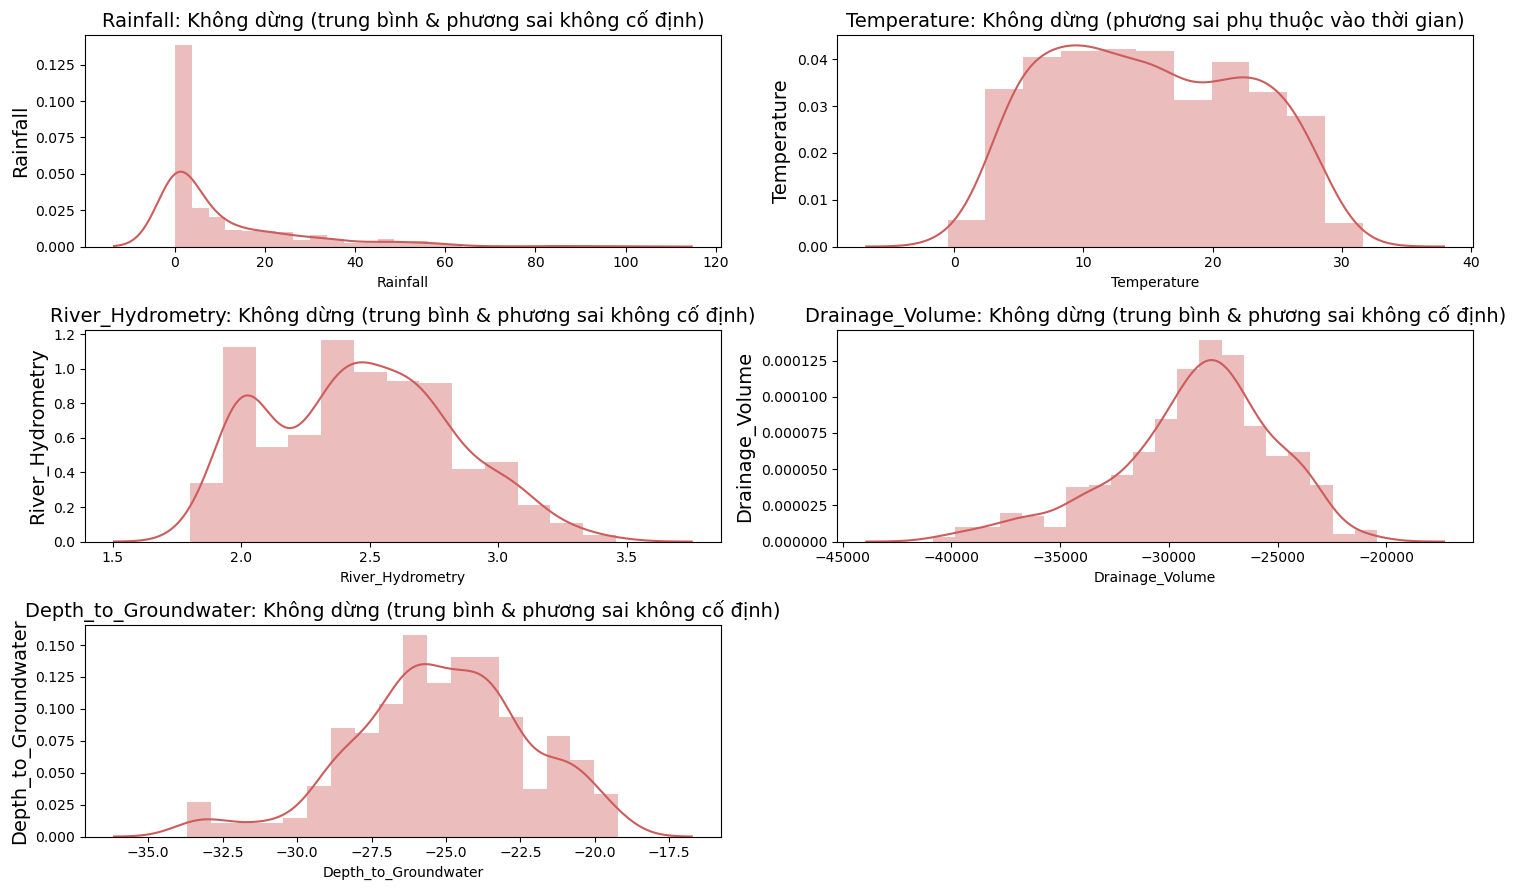

In [16]:
plot_params = [
    ('Rainfall', 'Rainfall: Không dừng (trung bình & phương sai không cố định)', 'Rainfall'),
    ('Temperature', 'Temperature: Không dừng (phương sai phụ thuộc vào thời gian)', 'Temperature'),
    ('River_Hydrometry', 'River_Hydrometry: Không dừng (trung bình & phương sai không cố định)', 'River_Hydrometry'),
    ('Drainage_Volume', 'Drainage_Volume: Không dừng (trung bình & phương sai không cố định)', 'Drainage_Volume'),
    ('Depth_to_Groundwater', 'Depth_to_Groundwater: Không dừng (trung bình & phương sai không cố định)', 'Depth_to_Groundwater')
]

f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

for i, (column, title, ylabel) in enumerate(plot_params):
    row, col = divmod(i, 2)
    sns.distplot(df[column].fillna(np.inf), ax=ax[row, col], color='indianred')
    ax[row, col].set_title(title, fontsize=14)
    ax[row, col].set_ylabel(ylabel=ylabel, fontsize=14)

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

**Nhận xét chung:**
- Các thuộc tính `Temperature` và `Depth_to_Groundwater` có xu hướng gần với phân bố Gaussian hơn, cho thấy tính dừng tốt hơn.

- Các thuộc tính `Rainfall` và `River_Hydrometry` có sự phân bố không đối xứng và không tuân theo phân bố Gaussian, cho thấy tính không dừng rõ rệt.

- Thuộc tính `Drainage_Volume` có xu hướng gần với phân bố Gaussian nhưng vẫn có một số biến động nhỏ.

#### 4.3. Augmented Dickey-Fuller (ADF) - Kiểm định Dickey-Fuller mở rộng 

📌 ***Unit Root Test***
- **Unit Root Test** là một đặc tính của chuỗi thời gian cho biết nó không dừng (non-stationary). 
- Phương trình biểu diễn một mô hình tự hồi quy (autoregressive model - AR) bậc 1, thường được ký hiệu là `AR(1)`:
$$
Yt = \alpha Y_{t-1} + \beta X_e + \epsilon
$$

> trong đó:
> - Y_{t-1} là giá trị của chuỗi thời gian tại thời điểm t-1
> - $\alpha$ là hệ số của số hạng trễ Y_{t-1} 
> - X_e đại diện cho các biến ngoại sinh (nếu có)
> - $\beta$ là hệ số của (các) biến ngoại sinh
> - $\epsilon$ là số hạng sai số (nhiễu trắng)

Khi $\alpha = 1$, phương trình này cho biết sự hiện diện của một căn đơn vị, có nghĩa là chuỗi thời gian không dừng.

📌 **Kiểm định Dickey-Fuller mở rộng (Augmented Dickey-Fuller - ADF)** là một trong những **Unit Root Test** được sử dụng phổ biến nhất.. Căn đơn vị là nguyên nhân gây ra `tính không dừng (non-stationarity)`.

- *Giả thuyết null (H0)*: Chuỗi thời gian có căn đơn vị (Chuỗi thời gian không dừng).

- *Giả thuyết thay thế (H1)*: Chuỗi thời gian không có căn đơn vị (Chuỗi thời gian dừng).

$\rightarrow$ Nếu giả thuyết null có thể bị bác bỏ, chúng ta có thể kết luận rằng chuỗi thời gian là dừng.

***Có hai cách để bác bỏ giả thuyết null:***

**1. Giả thuyết null có thể bị bác bỏ nếu giá trị p (p-value) nhỏ hơn một mức ý nghĩa đã đặt. Mức ý nghĩa mặc định là 5%.**
- `p-value` > `mức ý nghĩa (mặc định: 0.05)`: Không thể bác bỏ giả thuyết null `(H0)`, dữ liệu có căn đơn vị và không dừng.
- `p-value `<= `mức ý nghĩa (mặc định: 0.05)`: Bác bỏ giả thuyết null `(H0)`, dữ liệu không có căn đơn vị và dừng.

**2. Giả thuyết null có thể bị bác bỏ nếu thống kê kiểm định (test statistic) nhỏ hơn giá trị tới hạn (critical value).**
- `Thống kê ADF` > `giá trị tới hạn`: Không thể bác bỏ giả thuyết null `(H0)`, dữ liệu có căn đơn vị và không dừng.
- `Thống kê ADF` < `giá trị tới hạn`: Bác bỏ giả thuyết null `(H0)`, dữ liệu không có căn đơn vị và dừng.

$\rightarrow$ **Tóm lại:** Kiểm định ADF giúp chúng ta xác định xem một chuỗi thời gian có dừng hay không, một yếu tố quan trọng trong việc phân tích và dự báo chuỗi thời gian.

> Sử dụng kiểm định Dickey-Fuller mở rộng https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

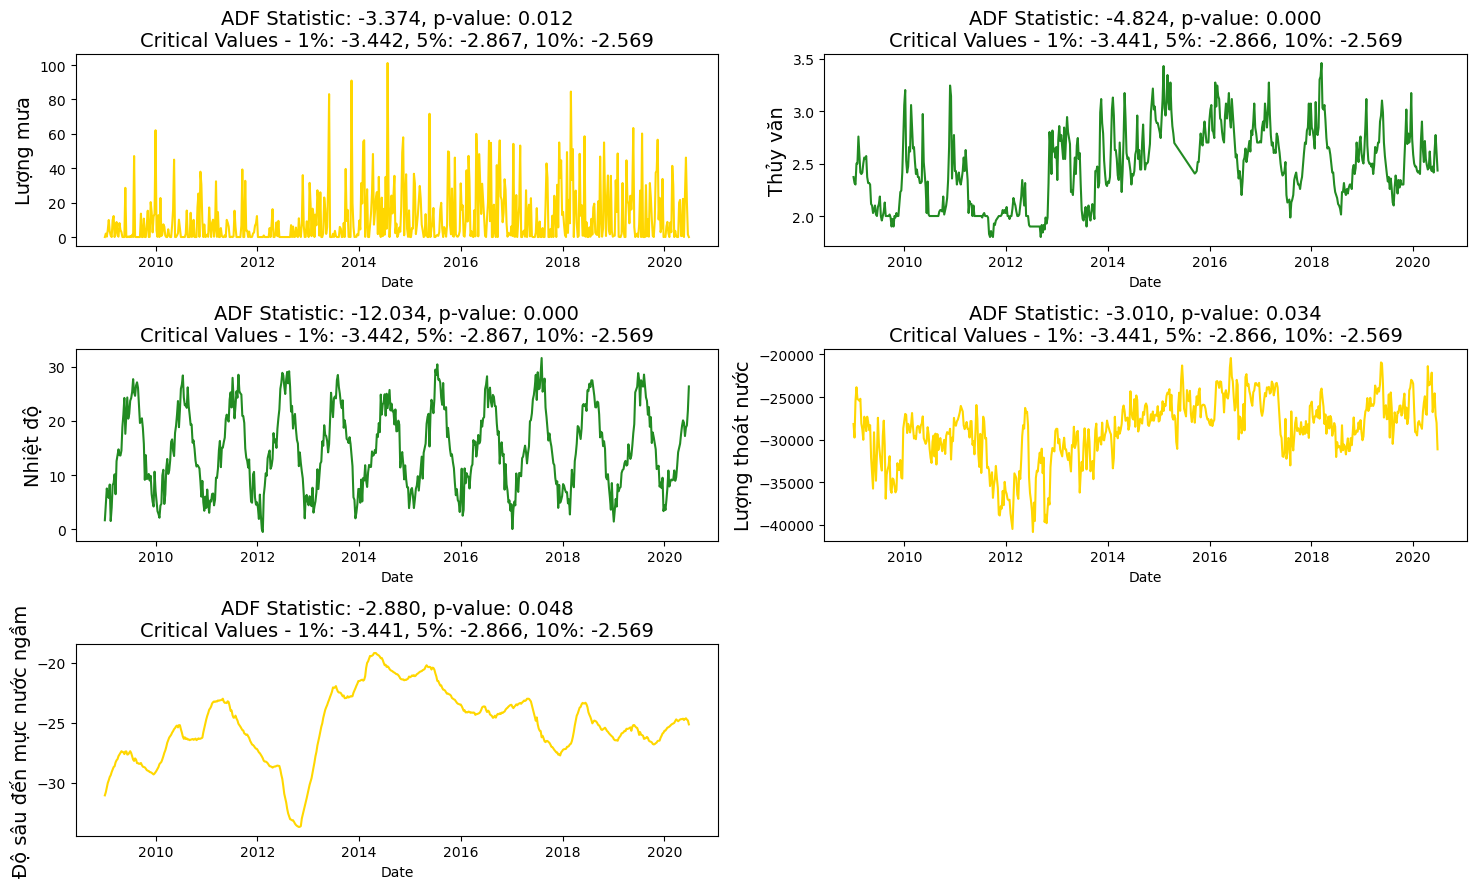

In [17]:
from statsmodels.tsa.stattools import adfuller

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    adf_stat, p_val, _, _, crit_vals, _ = result

    significance_level = 0.05
    crit_val_1, crit_val_5, crit_val_10 = crit_vals['1%'], crit_vals['5%'], crit_vals['10%']

    if p_val < significance_level:
        if adf_stat < crit_val_1:
            linecolor = 'forestgreen'
        elif adf_stat < crit_val_5:
            linecolor = 'gold'
        elif adf_stat < crit_val_10:
            linecolor = 'orange'
        else:
            linecolor = 'indianred'
    else:
        linecolor = 'indianred'

    sns.lineplot(x=df.Date, y=series, ax=ax, color=linecolor)
    ax.set_title(
        f'ADF Statistic: {adf_stat:0.3f}, p-value: {p_val:0.3f}\n'
        f'Critical Values - 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}',
        fontsize=14
    )
    ax.set_ylabel(ylabel=title, fontsize=14)

f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

plot_params = [
    ('Rainfall', 'Lượng mưa', ax[0, 0]),
    ('Temperature', 'Nhiệt độ', ax[1, 0]),
    ('River_Hydrometry', 'Thủy văn', ax[0, 1]),
    ('Drainage_Volume', 'Lượng thoát nước', ax[1, 1]),
    ('Depth_to_Groundwater', 'Độ sâu đến mực nước ngầm', ax[2, 0])
]

for column, title, axis in plot_params:
    visualize_adfuller_results(df[column].values, title, axis)

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()


>**Chú thích:**
>- Màu xanh lá cây: `adf_stat` $<$ `1%` 
>- Màu vàng: `adf_stat` $<$ `5%` 
>- Màu cam: `adf_stat` $<$ `11%` 
>- Màu đỏ: `adf_stat` $\geq$ `10%` hoặc `p_valua` $\geq$ `mức ý nghĩa`

**Nhận xét:**
- *Rainfall:* Thuộc tính này có bằng chứng dừng với `mức tin cậy 95%`. Giá trị ADF và giá trị p đều cho thấy chúng ta có thể bác bỏ giả thuyết không về không dừng (non-stationarity). Tuy nhiên, mức độ tin cậy không đạt đến 99%.

- *River Hydrometry:* Thuộc tính này có bằng chứng rất mạnh về tính dừng với `mức tin cậy 99%`. Giá trị ADF rất nhỏ và giá trị p rất thấp cho thấy tính dừng của chuỗi thời gian này là rất đáng tin cậy.

- *Temperature:* Thuộc tính này cũng có bằng chứng rất mạnh về tính dừng với `mức tin cậy 99%`. Giá trị ADF và giá trị p đều cho thấy tính dừng của chuỗi thời gian này là rất cao.

- *Drainage Volume:* Thuộc tính này có bằng chứng dừng với `mức tin cậy 95%`. Giá trị ADF và giá trị p đều chỉ ra rằng chúng ta có thể bác bỏ giả thuyết không về không dừng, nhưng mức độ tin cậy không đạt đến 99%.

- *Depth to Groundwater:* Thuộc tính này có bằng chứng dừng với `mức tin cậy 95%`. Giá trị ADF và giá trị p cho thấy chúng ta có thể bác bỏ giả thuyết không về không dừng với mức độ tin cậy tương đối cao, nhưng không đạt đến 99%.

$\rightarrow$ **Tóm lại:**
- Các thuộc tính `River_Hydrometry` và `Temperature` có bằng chứng mạnh nhất về tính dừng với `mức tin cậy 99%`.

- Các thuộc tính `Rainfall`, `Drainage_Volume`, và `Depth_to_Groundwater` có bằng chứng về tính dừng với `mức tin cậy 90% đến 95%`.

- Tính dừng của các chuỗi thời gian này cho thấy rằng chúng có thể phù hợp để sử dụng trong các mô hình dự báo yêu cầu dữ liệu dừng như ARIMA, sau khi áp dụng các phương pháp biến đổi thích hợp nếu cần.

📌 ***Hai phương pháp phổ biến nhất để đạt được tính ổn định (tính dừng) cho chuỗi thời gian là:***

- **Transformation:**
    - *Log Transformation*: Lấy logarit của các giá trị chuỗi thời gian để làm mượt dữ liệu và giảm biến động. Phương pháp này thường được sử dụng khi dữ liệu có sự biến thiên lớn hoặc xu hướng tăng trưởng theo thời gian.
        - Công thức: $y'_t = log(y_t)$

    - *Square Root Transformation:* Lấy căn bậc hai của các giá trị chuỗi thời gian để giảm sự biến động của dữ liệu, đặc biệt là khi dữ liệu có sự phân bố không đồng nhất.
        - Công thức: $y'_t = \sqrt{y_t}$

    - *Box-Cox Transformation:* Là một phương pháp biến đổi linh hoạt, có thể điều chỉnh để làm mượt dữ liệu và xử lý các vấn đề về phương sai không ổn định.
        - Công thức: $y'_t = \frac{y_t^{\lambda} - 1}{\lambda}$ trong đó $\lambda$ là tham số biến đổi được tối ưu hóa.

- **Differencing:**
    - *First Order Differencing:* Lấy sai phân bậc nhất để loại bỏ xu hướng tuyến tính, tức là trừ đi giá trị trước đó từ giá trị hiện tại.
        - Công thức: $y'_t = y_t - y_{t-1}$
 
    - *Second Order Differencing:* Lấy sai phân bậc hai để loại bỏ xu hướng phi tuyến tính hoặc xu hướng bậc hai.
        - Công thức: $y'_t = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) = y_t - 2y_{t-1} + y_{t-2}$
 
    - *Seasonal Differencing:* Lấy sai phân mùa vụ để loại bỏ tính thời vụ trong dữ liệu.
        - Công thức: $y'_t = y_t - y_{t-s}$ , trong đó $s$ là chu kỳ mùa vụ.

##### 4.3.1. Transform

***Thực hiện Transform với `Depth_to_Groundwater` để đánh giá***

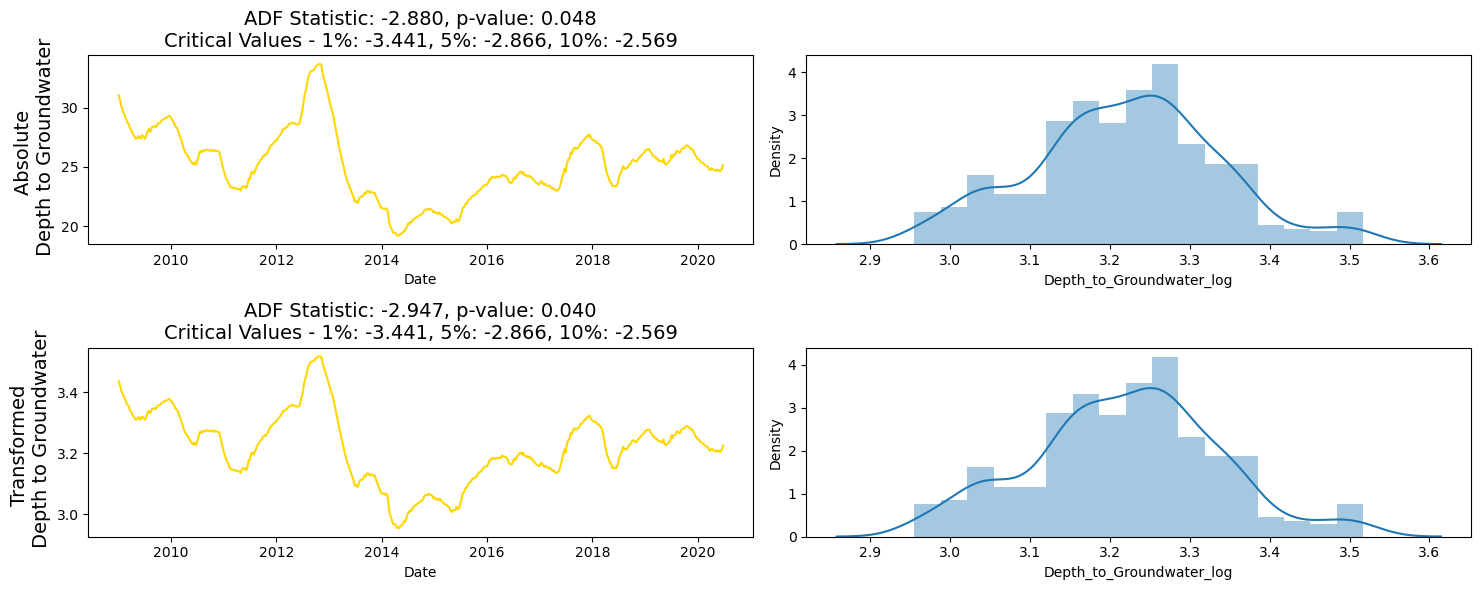

In [18]:
df['Depth_to_Groundwater_log'] = np.log(abs(df.Depth_to_Groundwater)) # Sử dụng phương pháp Log transformation

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
visualize_adfuller_results(abs(df.Depth_to_Groundwater), 'Absolute \n Depth to Groundwater', ax[0, 0])

sns.distplot(df.Depth_to_Groundwater_log, ax=ax[0, 1])
visualize_adfuller_results(df.Depth_to_Groundwater_log, 'Transformed \n Depth to Groundwater', ax[1, 0])

sns.distplot(df.Depth_to_Groundwater_log, ax=ax[1, 1])

plt.tight_layout()
plt.show()

**Nhận xét:**
- *Phân phối ban đầu:*
    - Dữ liệu gốc có vẻ không tuân theo phân phối chuẩn, có thể hơi lệch phải với một số giá trị ngoại lệ.
    - Biểu đồ thời gian cho thấy có sự biến động theo thời gian, với xu hướng tăng giảm không rõ ràng.
    - Kết quả kiểm định ADF (Augmented Dickey-Fuller) với p-value là `0.048`, nhỏ hơn mức ý nghĩa 5%, cho thấy có bằng chứng để bác bỏ giả thuyết null (giả thuyết cho rằng dữ liệu không dừng). Tuy nhiên, giá trị này khá gần với ngưỡng 5% nên có thể cần thêm phân tích để khẳng định tính dừng của dữ liệu.

- *Phân phối sau khi Sử dụng phương pháp Log transformation*:
    - Sau khi biến đổi logarit, phân phối của dữ liệu trở nên đối xứng hơn và gần với phân phối chuẩn hơn.
    - Biểu đồ thời gian vẫn cho thấy sự biến động theo thời gian, nhưng biên độ dao động đã giảm đi.
    - Kết quả kiểm định ADF với p-value là `0.040`, cũng nhỏ hơn mức ý nghĩa 5%, cung cấp thêm bằng chứng về tính dừng của dữ liệu sau khi biến đổi logarit.

$\rightarrow$ ***Việc biến đổi logarit đã giúp cải thiện tính dừng của thuộc tính `Depth_to_Groundwater` và làm cho phân phối của nó trở nên gần với phân phối chuẩn hơn.***

##### 4.3.2. Differencing

***Tiếp tục thực hiện Differencing với `Depth_to_Groundwater` để đánh giá***

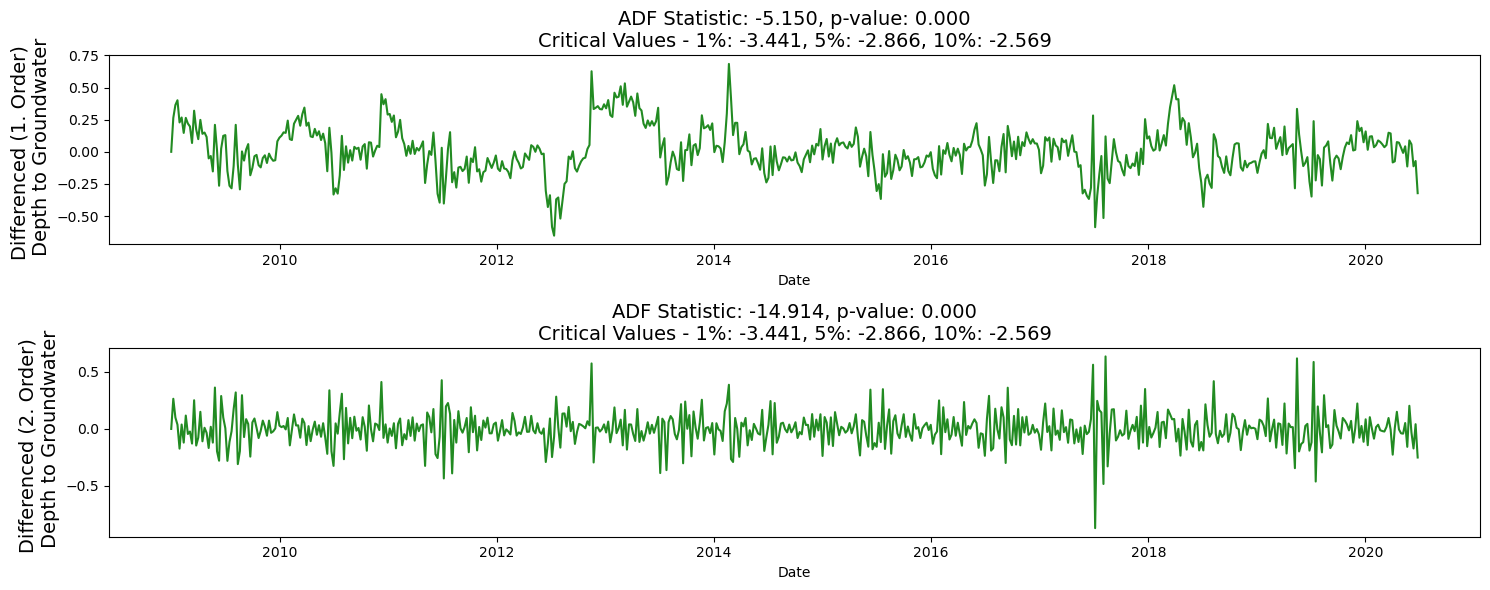

In [19]:
# First Order Differencing
ts_diff = np.diff(df.Depth_to_Groundwater)
df['Depth_to_Groundwater_diff_1'] = np.append([0], ts_diff)

# Second Order Differencing
ts_diff = np.diff(df.Depth_to_Groundwater_diff_1)
df['Depth_to_Groundwater_diff_2'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))

visualize_adfuller_results(df.Depth_to_Groundwater_diff_1, 'Differenced (1. Order) \n Depth to Groundwater', ax[0])
visualize_adfuller_results(df.Depth_to_Groundwater_diff_2, 'Differenced (2. Order) \n Depth to Groundwater', ax[1])
plt.tight_layout()
plt.show()

**Nhận xét:**
- *First Order Differencing:*
    - Biểu đồ trên cho thấy chuỗi thời gian sau khi sai phân bậc 1. Có vẻ như xu hướng tăng giảm đã được loại bỏ phần nào, nhưng vẫn còn một số biến động theo thời gian.
    - Kết quả kiểm định ADF cho thấy thống kê ADF là `-5.150`, nhỏ hơn giá trị tới hạn 1% `(-3.441)`. Điều này cho thấy có bằng chứng mạnh mẽ để bác bỏ giả thuyết null (giả thuyết cho rằng chuỗi không dừng). Do đó, có thể kết luận rằng chuỗi sau khi sai phân bậc 1 đã trở nên dừng.

- *Second Order Differencing:*
    - Biểu đồ dưới cho thấy chuỗi thời gian sau khi sai phân bậc 2. Biến động theo thời gian dường như đã giảm đi nhiều hơn so với sau sai phân bậc 1.
    - Kết quả kiểm định ADF cho thấy thống kê ADF là `-14.914`, nhỏ hơn rất nhiều so với giá trị tới hạn 1% `(-3.441)`. Điều này củng cố thêm kết luận rằng chuỗi sau khi sai phân bậc 2 cũng đã trở nên dừng.

$\rightarrow$ **Tóm lại:**
- Cả hai lần sai phân đều có vẻ hiệu quả trong việc loại bỏ xu hướng và làm cho chuỗi thời gian trở nên dừng.

- Tuy nhiên, sai phân bậc 2 dường như làm giảm biến động theo thời gian nhiều hơn so với sai phân bậc 1.

### Lưu dữ liệu vào tệp .csv

In [20]:
save_name = "Water_Cleaner_2.csv"
df.to_csv("./data/" + save_name, index=False)